In [117]:
#importing libraries
import numpy as np
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import seaborn as sns
import pandas as pd
# from sklearn.pipeline import make_pipeline, make_union, Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence, permutation_importance
from sklearn import linear_model
import pickle
import csv
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [52]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import bisect
from scipy.sparse import hstack

# New Section

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv('/content/drive/MyDrive/ml2-project/kdd_preprocessed.csv')

In [55]:
df.head()

,Unnamed: 0,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,Var57,Var65,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var163,Var173,Var181,Var193_2Knk1KF,Var193_2wnefc9ISdLjfQoAYBI,Var193_5QKIjwyXr4MCZTEp7uAkS8PtBLcn,Var193_8kO9LslBGNXoLvWEuN6tPuN59TdYxfL9Sm6oU,Var193_9U2tunPAje3TwfLLUQxzM3dC1ghn,...,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var228_0pzBWGkV3fbsGZN52DH,Var228_4rd_,Var228_55YFVY9,Var228_5oZS,Var228_6nxx00q6gnIF8ePJ3P3AEfZ1N,Var228_9VmiOykV3fbsAg65e4w,Var228_DU8B,Var228_F2FcTt7IdMT_v,Var228_F2FyR07IdsN7I,Var228_JnGLH58smNxIYcGK39k,Var228_NoEd,Var228_R4y5gQQWY8OodqDV,Var228_RjBDiL8f9CQYc21fICscNNpj6,Var228_SbOd7O8ky1wGNxp0Arj0Xs,Var228_TCU50_Yjmm6GIBZ0lL_,Var228_VjDE,Var228_WfJ2BB2SFSqauljlfOB,Var228_WfJYmPMksSqa1pajvfG,Var228_ZeaF,Var228_Zy3gnGM,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,appetency_labels,churn_labels,upselling_labels
0,0,1526.000000,7.0,184.0,464.000000,14.000000,166.56,0.0,3570.0,0.0,4.076907,9.0,35.0,1350864.0,0.0,7333.110000,5.0,12.0,104.00000,168.0,117625.60,1175.000000,720.0,8.00000,0.0,1212385.0,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,38418.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,0.0,0.0,168.000000,2.000000,353.52,0.0,4764966.0,0.0,5.408032,9.0,0.0,2872928.0,3.0,151098.900000,25.0,2.0,40.00000,40.0,-356411.60,590.000000,0.0,-0.55388,8.0,4136430.0,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,238572.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,5236.000000,7.0,904.0,1212.000000,26.000000,220.08,0.0,5883894.0,0.0,6.599658,9.0,518.0,1675776.0,0.0,16211.580000,40.0,58.0,312.00000,336.0,405104.00,3230.000000,5967.0,-28.00000,0.0,3478905.0,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,434946.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,1326.437116,0.0,0.0,234.518225,4.507926,22.08,0.0,0.0,0.0,1.988250,9.0,0.0,0.0,0.0,103084.052693,0.0,0.0,60.88866,0.0,-275703.60,916.112185,0.0,-14.00000,0.0,0.0,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1029.000000,7.0,3216.0,64.000000,4.000000,200.00,0.0,0.0,0.0,4.552446,18.0,224.0,784448.0,0.0,37423.500000,0.0,0.0,32.00000,56.0,10714.84,215.000000,15111.0,58.00000,0.0,150650.0,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df = df.drop(axis=1, columns=['Unnamed: 0'])

In [57]:
df.head()

,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,Var57,Var65,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var163,Var173,Var181,Var193_2Knk1KF,Var193_2wnefc9ISdLjfQoAYBI,Var193_5QKIjwyXr4MCZTEp7uAkS8PtBLcn,Var193_8kO9LslBGNXoLvWEuN6tPuN59TdYxfL9Sm6oU,Var193_9U2tunPAje3TwfLLUQxzM3dC1ghn,Var193_AERks4l,...,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var228_0pzBWGkV3fbsGZN52DH,Var228_4rd_,Var228_55YFVY9,Var228_5oZS,Var228_6nxx00q6gnIF8ePJ3P3AEfZ1N,Var228_9VmiOykV3fbsAg65e4w,Var228_DU8B,Var228_F2FcTt7IdMT_v,Var228_F2FyR07IdsN7I,Var228_JnGLH58smNxIYcGK39k,Var228_NoEd,Var228_R4y5gQQWY8OodqDV,Var228_RjBDiL8f9CQYc21fICscNNpj6,Var228_SbOd7O8ky1wGNxp0Arj0Xs,Var228_TCU50_Yjmm6GIBZ0lL_,Var228_VjDE,Var228_WfJ2BB2SFSqauljlfOB,Var228_WfJYmPMksSqa1pajvfG,Var228_ZeaF,Var228_Zy3gnGM,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,appetency_labels,churn_labels,upselling_labels
0,1526.000000,7.0,184.0,464.000000,14.000000,166.56,0.0,3570.0,0.0,4.076907,9.0,35.0,1350864.0,0.0,7333.110000,5.0,12.0,104.00000,168.0,117625.60,1175.000000,720.0,8.00000,0.0,1212385.0,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,38418.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,525.000000,0.0,0.0,168.000000,2.000000,353.52,0.0,4764966.0,0.0,5.408032,9.0,0.0,2872928.0,3.0,151098.900000,25.0,2.0,40.00000,40.0,-356411.60,590.000000,0.0,-0.55388,8.0,4136430.0,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,238572.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5236.000000,7.0,904.0,1212.000000,26.000000,220.08,0.0,5883894.0,0.0,6.599658,9.0,518.0,1675776.0,0.0,16211.580000,40.0,58.0,312.00000,336.0,405104.00,3230.000000,5967.0,-28.00000,0.0,3478905.0,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,434946.0,0.0,0.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1326.437116,0.0,0.0,234.518225,4.507926,22.08,0.0,0.0,0.0,1.988250,9.0,0.0,0.0,0.0,103084.052693,0.0,0.0,60.88866,0.0,-275703.60,916.112185,0.0,-14.00000,0.0,0.0,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1029.000000,7.0,3216.0,64.000000,4.000000,200.00,0.0,0.0,0.0,4.552446,18.0,224.0,784448.0,0.0,37423.500000,0.0,0.0,32.00000,56.0,10714.84,215.000000,15111.0,58.00000,0.0,150650.0,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
x = df.drop(['appetency_labels', 'churn_labels', 'upselling_labels'], axis =1)
y_churn = df['churn_labels']
x_train, x_val, y_train_churn, y_val_churn = train_test_split(x, y_churn, test_size=0.2, random_state=21)

In [59]:
x_train.head()

,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,Var57,Var65,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var163,Var173,Var181,Var193_2Knk1KF,Var193_2wnefc9ISdLjfQoAYBI,Var193_5QKIjwyXr4MCZTEp7uAkS8PtBLcn,Var193_8kO9LslBGNXoLvWEuN6tPuN59TdYxfL9Sm6oU,Var193_9U2tunPAje3TwfLLUQxzM3dC1ghn,Var193_AERks4l,...,Var226_wX53,Var226_w_Ub,Var226_xb3V,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var228_0pzBWGkV3fbsGZN52DH,Var228_4rd_,Var228_55YFVY9,Var228_5oZS,Var228_6nxx00q6gnIF8ePJ3P3AEfZ1N,Var228_9VmiOykV3fbsAg65e4w,Var228_DU8B,Var228_F2FcTt7IdMT_v,Var228_F2FyR07IdsN7I,Var228_JnGLH58smNxIYcGK39k,Var228_NoEd,Var228_R4y5gQQWY8OodqDV,Var228_RjBDiL8f9CQYc21fICscNNpj6,Var228_SbOd7O8ky1wGNxp0Arj0Xs,Var228_TCU50_Yjmm6GIBZ0lL_,Var228_VjDE,Var228_WfJ2BB2SFSqauljlfOB,Var228_WfJYmPMksSqa1pajvfG,Var228_ZeaF,Var228_Zy3gnGM,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0
4183,133.000000,0.0,0.0,128.000000,2.000000,210.48,0.0,3326484.0,0.0,3.875026,9.0,0.0,3801704.0,0.0,230212.200000,20.0,0.0,40.00000,48.0,10088.72,325.000000,0.0,-8.00000,0.0,4146260.0,792020.0,0.0,0.0,0.000000,554414.000000,10286800.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18443,1326.437116,0.0,0.0,234.518225,4.507926,22.08,0.0,0.0,0.0,4.722709,9.0,0.0,0.0,0.0,103084.052693,0.0,0.0,60.88866,0.0,-78422.80,916.112185,0.0,-20.00000,0.0,0.0,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26332,252.000000,0.0,0.0,204.000000,4.000000,253.52,0.0,6015600.0,0.0,2.186499,9.0,0.0,1892944.0,0.0,192229.500000,30.0,10.0,72.00000,56.0,115528.40,565.000000,0.0,4.00000,0.0,2862395.0,481102.0,0.0,0.0,0.000000,18186.000000,10571520.0,1031352.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39816,567.000000,7.0,0.0,160.000000,0.000000,166.56,0.0,44814.0,0.0,6.407605,9.0,0.0,53072.0,0.0,26101.080000,0.0,0.0,0.00000,48.0,87168.40,355.000000,99.0,-0.55388,0.0,108340.0,103930.0,45.0,0.0,18.000000,0.000000,350944.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21627,518.000000,0.0,0.0,144.000000,0.000000,320.40,0.0,3110400.0,0.0,1.310404,9.0,0.0,2073600.0,0.0,195122.700000,5.0,8.0,32.00000,24.0,111785.60,605.000000,0.0,-28.00000,0.0,2429365.0,1934108.0,0.0,0.0,18.000000,0.000000,10521280.0,2073600.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
x_val.head()

,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,Var57,Var65,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var163,Var173,Var181,Var193_2Knk1KF,Var193_2wnefc9ISdLjfQoAYBI,Var193_5QKIjwyXr4MCZTEp7uAkS8PtBLcn,Var193_8kO9LslBGNXoLvWEuN6tPuN59TdYxfL9Sm6oU,Var193_9U2tunPAje3TwfLLUQxzM3dC1ghn,Var193_AERks4l,...,Var226_wX53,Var226_w_Ub,Var226_xb3V,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var228_0pzBWGkV3fbsGZN52DH,Var228_4rd_,Var228_55YFVY9,Var228_5oZS,Var228_6nxx00q6gnIF8ePJ3P3AEfZ1N,Var228_9VmiOykV3fbsAg65e4w,Var228_DU8B,Var228_F2FcTt7IdMT_v,Var228_F2FyR07IdsN7I,Var228_JnGLH58smNxIYcGK39k,Var228_NoEd,Var228_R4y5gQQWY8OodqDV,Var228_RjBDiL8f9CQYc21fICscNNpj6,Var228_SbOd7O8ky1wGNxp0Arj0Xs,Var228_TCU50_Yjmm6GIBZ0lL_,Var228_VjDE,Var228_WfJ2BB2SFSqauljlfOB,Var228_WfJYmPMksSqa1pajvfG,Var228_ZeaF,Var228_Zy3gnGM,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0
26733,0.0,0.0,336.0,0.0,4.507926,223.44,0.0,0.0,0.0,2.446272,18.0,0.0,0.0,3.0,0.00,0.0,0.0,60.88866,0.0,-306411.60,0.0,59229.0,4.00000,24.0,0.0,0.0,0.0,0.0,0.0,2.949208e+05,0.0,0.0,0.0,14.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33996,749.0,14.0,120.0,124.0,0.000000,186.64,0.0,3916278.0,0.0,6.724418,18.0,21.0,2764800.0,15.0,228468.00,15.0,4.0,32.00000,32.0,467488.00,490.0,4995.0,-0.55388,72.0,5282000.0,172800.0,910.0,12.0,9.0,0.000000e+00,10292440.0,1036800.0,0.0,14.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20423,266.0,0.0,0.0,140.0,4.000000,253.52,0.0,3849528.0,0.0,5.146336,9.0,0.0,2534464.0,0.0,176762.10,10.0,4.0,32.00000,32.0,216400.40,640.0,0.0,4.00000,0.0,4038885.0,1108822.0,0.0,0.0,9.0,1.108828e+06,10549560.0,950436.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17716,1498.0,14.0,644.0,372.0,4.000000,166.56,0.0,0.0,0.0,6.846614,18.0,7.0,741536.0,0.0,18962.64,0.0,44.0,136.00000,184.0,22397.28,935.0,28521.0,-20.00000,0.0,729720.0,172196.0,920.0,0.0,9.0,8.862000e+03,1476600.0,266496.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49103,1253.0,0.0,8.0,268.0,6.000000,266.88,0.0,1158288.0,0.0,4.092074,9.0,0.0,842320.0,0.0,52334.10,45.0,8.0,80.00000,72.0,943672.00,905.0,6813.0,40.00000,0.0,2034765.0,443354.0,0.0,0.0,0.0,3.760890e+05,4289400.0,660384.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
s1 = x_train[y_train_churn==0]
s2 = x_train[y_train_churn==1]
m1 = s1.mean()
m2 = s2.mean()
std1 = s1.std()
std2 = s2.std()
n1 = len(s1)
n2 = len(s2)

In [62]:
t_stats = np.abs(m1-m2)/np.sqrt((std1**2/n1) + (std2**2/n2))

In [63]:
t_stats =  abs(t_stats).sort_values(ascending = False)

In [64]:
top15_churn = t_stats.index[:15]

In [65]:
print("The top 15 best predictors are", list(top15_churn), sep = "\t")

The top 15 best predictors are	['Var212_NhsEn4L', 'Var7', 'Var193_RO12', 'Var228_F2FyR07IdsN7I', 'Var144', 'Var113', 'Var205_sJzTlal', 'Var126', 'Var13', 'Var74', 'Var193_2Knk1KF', 'Var207_me75fM6ugJ', 'Var207_7M47J5GA0pTYIFxg5uy', 'Var227_ZI9m', 'Var227_RAYp']


In [66]:
x_train_new = x_train[list(top15_churn)]
x_val_new = x_val[list(top15_churn)]

In [102]:
x_train_new.shape

(40000, 15)

In [68]:
y_train_churn.head()

4183     0
18443    0
26332    1
39816    0
21627    0
Name: churn_labels, dtype: int64

In [69]:
y_val_churn.head()

26733    0
33996    0
20423    0
17716    0
49103    0
Name: churn_labels, dtype: int64

# Decision Tree

In [70]:
DecisionTree_churn = DecisionTreeClassifier(random_state=42)
DecisionTree_churn.fit(x_train_new, y_train_churn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [71]:
y_train_pred_churn_dt = DecisionTree_churn.predict(x_train_new)
y_val_pred_churn_dt = DecisionTree_churn.predict(x_val_new)

In [72]:
dt_churn_probs = DecisionTree_churn.predict_proba(x_val_new)
dt_churn_probs = dt_churn_probs[:, 1]

In [90]:
# printing roc_auc score
dt_auc_churn = roc_auc_score(y_val_churn, dt_churn_probs)
print('DecisionTree: ROC AUC=%.3f' % (dt_auc_churn))

DecisionTree: ROC AUC=0.522


In [74]:
# printing train and validation accuracies
train_accuracy = accuracy_score(y_train_churn, y_train_pred_churn_dt)
validation_accuracy = accuracy_score(y_val_churn, y_val_pred_churn_dt)
print("Train Accuracy DT", np.round(train_accuracy,3))
print("Validation Accuracy DT", np.round(validation_accuracy,3))

Train Accuracy DT 0.999
Validation Accuracy DT 0.861


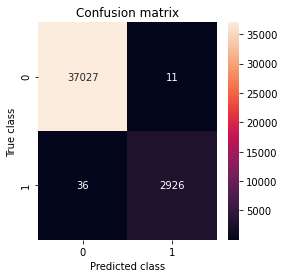

In [75]:
# confusion matrix for train
conf_matrix = confusion_matrix(y_train_churn, y_train_pred_churn_dt)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

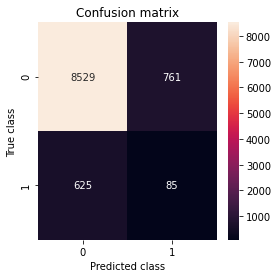

In [76]:
# confusion matrix for val
conf_matrix = confusion_matrix(y_val_churn, y_val_pred_churn_dt)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [77]:
# printing recall and fnr values
tn, fp, fn, tp = confusion_matrix(y_val_churn, y_val_pred_churn_dt).ravel()
recall_churn = tp/(tp + fn)
FNR_value = 1 - recall_churn
print(f'Recall_churn: {recall_churn:.3f}, FNR_value: {FNR_value:.3f}')

Recall_churn: 0.120, FNR_value: 0.880


In [146]:
# printing roc-auc scores for train and val
print(f'ROC AUC for train dt: {roc_auc_score(y_train_churn, y_train_pred_churn_dt):.3f}')
print(f'ROC AUC for val dt: {roc_auc_score(y_val_churn, y_val_pred_churn_dt):.3f}')

ROC AUC for train dt: 0.994
ROC AUC for val dt: 0.519


In [147]:
# classification report of train
print(classification_report(y_train_churn, y_train_pred_churn_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37038
           1       1.00      0.99      0.99      2962

    accuracy                           1.00     40000
   macro avg       1.00      0.99      1.00     40000
weighted avg       1.00      1.00      1.00     40000



In [148]:
# classification report of val
print(classification_report(y_val_churn, y_val_pred_churn_dt))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9290
           1       0.10      0.12      0.11       710

    accuracy                           0.86     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.87      0.86      0.87     10000



In [82]:
# printing f1 scores for train and val
f1_churn = f1_score(y_train_churn, y_train_pred_churn_dt)
print("f1 score for train is ", np.round(f1_churn,3))
f1_churn = f1_score(y_val_churn, y_val_pred_churn_dt)
print("f1 score for val is ", np.round(f1_churn,3))

f1 score for train is  0.992
f1 score for val is  0.109


In [83]:
#Define a function to calculate feature importance 
def feature_importance(cols, fi, fistd = 0):
    return pd.DataFrame({'features':cols, 'importance':fi, 'importance_std': fistd}).sort_values('importance', ascending=False)

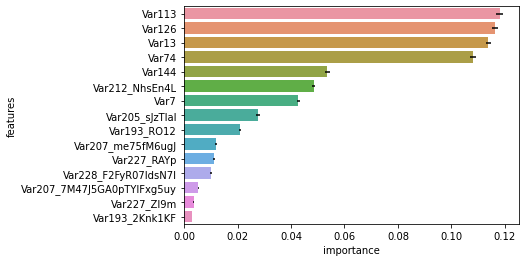

In [85]:
#Calculate permutation importance and plot a bar chart 
pfi = permutation_importance(DecisionTree_churn, x_train_new, y_train_churn, n_repeats=30)
pfidf = feature_importance(x_train_new.columns, pfi['importances_mean'], pfi['importances_std'])

#Plot the bar plot
sns.barplot(data=pfidf, x='importance', y='features', xerr=pfidf.importance_std)

# Random Forest model

In [86]:
RF_model_churn = RandomForestClassifier(n_estimators=200, max_depth = 35, min_samples_split = 2, min_samples_leaf = 1)
RF_model_churn.fit(x_train_new, y_train_churn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=35, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
y_train_pred_churn_rf = RF_model_churn.predict(x_train_new)
y_val_pred_churn_rf = RF_model_churn.predict(x_val_new)

In [88]:
rf_churn_probs = RF_model_churn.predict_proba(x_val_new)
rf_churn_probs = rf_churn_probs[:, 1]

In [89]:
# printing roc_auc score
rf_auc_churn = roc_auc_score(y_val_churn, rf_churn_probs)
print('RandomForest: ROC AUC=%.3f' % (rf_auc_churn))

RandomForest: ROC AUC=0.629


In [91]:
# printing train and validation accuracies
train_accuracy = accuracy_score(y_train_churn, y_train_pred_churn_rf)
validation_accuracy = accuracy_score(y_val_churn, y_val_pred_churn_rf)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.997
Validation Accuracy 0.91


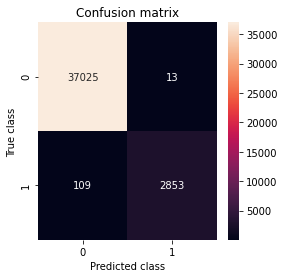

In [93]:
# conf-matrix for train data
conf_matrix = confusion_matrix(y_train_churn, y_train_pred_churn_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

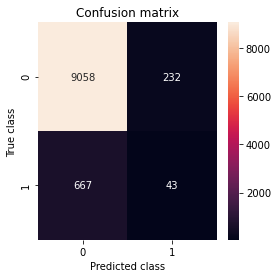

In [92]:
# conf-matrix for val data
conf_matrix = confusion_matrix(y_val_churn, y_val_pred_churn_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [97]:
# recall and fnr values
tn, fp, fn, tp = confusion_matrix(y_val_churn, y_val_pred_churn_rf).ravel()
recall_churn = tp/(tp + fn)
FNR_value = 1 - recall_churn
print(f'Recall_churn: {recall_churn:.3f}, FNR_value: {FNR_value:.3f}')

Recall_churn: 0.061, FNR_value: 0.939


In [98]:
# printing roc-auc scores for train and val
print(f'ROC AUC for train rf: {roc_auc_score(y_train_churn, y_train_pred_churn_rf):.3f}')
print(f'ROC AUC for val rf: {roc_auc_score(y_val_churn, y_val_pred_churn_rf):.3f}')

ROC AUC for train rf: 0.981
ROC AUC for val rf: 0.518


In [151]:
# classification report of train
print(classification_report(y_train_churn, y_train_pred_churn_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37038
           1       1.00      0.96      0.98      2962

    accuracy                           1.00     40000
   macro avg       1.00      0.98      0.99     40000
weighted avg       1.00      1.00      1.00     40000



In [152]:
# classification report of val
print(classification_report(y_val_churn, y_val_pred_churn_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9290
           1       0.16      0.06      0.09       710

    accuracy                           0.91     10000
   macro avg       0.54      0.52      0.52     10000
weighted avg       0.88      0.91      0.89     10000



In [99]:
# printing f1 scores for train and val
f1_churn = f1_score(y_train_churn, y_train_pred_churn_rf)
print("f1 score for train is ", np.round(f1_churn,3))
f1_churn = f1_score(y_val_churn, y_val_pred_churn_rf)
print("f1 score for val is ", np.round(f1_churn,3))

f1 score for train is  0.979
f1 score for val is  0.087


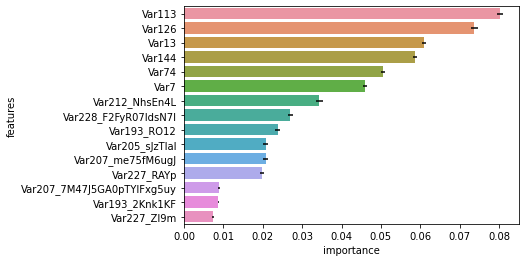

In [100]:
#Calculate permutation importance and plot a bar chart 
pfi = permutation_importance(RF_model_churn, x_train_new, y_train_churn, n_repeats=30)
pfidf = feature_importance(x_train_new.columns, pfi['importances_mean'], pfi['importances_std'])

#Plot the bar plot
sns.barplot(data=pfidf, x='importance', y='features', xerr=pfidf.importance_std)

# XG Boost

In [103]:
xgb_model = xgb.XGBClassifier(nthread=-1, objective='multi:softmax',num_class= 2,learning_rate=0.0001,max_depth=15,colsample_bytree=0.7,subsample=0.7)
xgb_model.fit(x_train_new, y_train_churn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, num_class=2, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=1)

In [104]:
xgb_pred_train = xgb_model.predict(x_train_new)
xgb_pred_val = xgb_model.predict(x_val_new)


In [105]:
# xgb.Booster()
xgb_churn_probs = xgb_model.predict_proba(x_val_new)
xgb_churn_probs = xgb_churn_probs[:, 1]



In [107]:
# printing roc auc of val
xgb_auc_churn = roc_auc_score(y_val_churn, xgb_churn_probs)
print('XGB boost: ROC AUC=%.3f' % (xgb_auc_churn))

XGB boost: ROC AUC=0.502


In [109]:
# printing train and val accuracies
train_accuracy = accuracy_score(y_train_churn, xgb_pred_train)
validation_accuracy = accuracy_score(y_val_churn, xgb_pred_val)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.926
Validation Accuracy 0.929


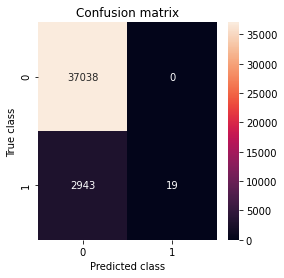

In [111]:
# confusion matrix of train data
conf_matrix = confusion_matrix(y_train_churn, xgb_pred_train)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

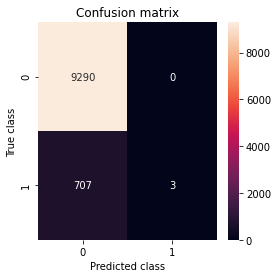

In [110]:
# confusion matrix of val data
conf_matrix = confusion_matrix(y_val_churn, xgb_pred_val)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [112]:
# recall and fnr value
tn, fp, fn, tp = confusion_matrix(y_val_churn, xgb_pred_val).ravel()
recall_churn = tp/(tp + fn)
FNR_value = 1 - recall_churn
print(f'Recall_churn: {recall_churn:.3f}, FNR_value: {FNR_value:.3f}')

Recall_churn: 0.004, FNR_value: 0.996


In [114]:
# printing roc-auc scores for train and val
print(f'ROC AUC for train XGBoost: {roc_auc_score(y_train_churn, xgb_pred_train):.3f}')
print(f'ROC AUC for val XGBoost: {roc_auc_score(y_val_churn, xgb_pred_val):.3f}')

ROC AUC for train XGBoost: 0.503
ROC AUC for val XGBoost: 0.502


In [120]:
# classification report of train
print(classification_report(y_train_churn, xgb_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     37038
           1       1.00      0.01      0.01      2962

    accuracy                           0.93     40000
   macro avg       0.96      0.50      0.49     40000
weighted avg       0.93      0.93      0.89     40000



In [119]:
# classification report of val
print(classification_report(y_val_churn, xgb_pred_val))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9290
           1       1.00      0.00      0.01       710

    accuracy                           0.93     10000
   macro avg       0.96      0.50      0.49     10000
weighted avg       0.93      0.93      0.90     10000



In [121]:
# f1 scores for train and val
f1_churn = f1_score(y_train_churn, xgb_pred_train)
print("f1 score for train is ", np.round(f1_churn,3))
f1_churn = f1_score(y_val_churn, xgb_pred_val)
print("f1 score for val is ", np.round(f1_churn,3))

f1 score for train is  0.013
f1 score for val is  0.008


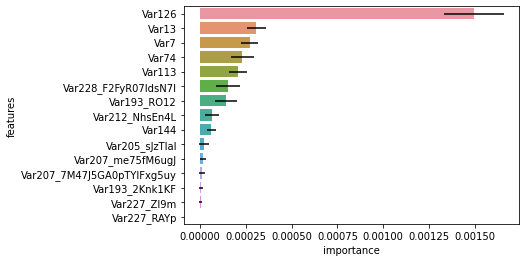

In [118]:
#Calculate permutation importance and plot a bar chart 
pfi = permutation_importance(xgb_model, x_train_new, y_train_churn, n_repeats=30)
pfidf = feature_importance(x_train_new.columns, pfi['importances_mean'], pfi['importances_std'])

#Plot the bar plot
sns.barplot(data=pfidf, x='importance', y='features', xerr=pfidf.importance_std)

# MLP

In [122]:
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam


In [123]:
# taking a look at the input shape
x_train_new.shape[1]

15

In [124]:
#Build the model
MLP = models.Sequential()
MLP.add(Dense(1000, activation='relu', input_shape = (15,),kernel_initializer='uniform'))
MLP.add(Dense(500, activation='relu', kernel_initializer='uniform'))
MLP.add(Dense(1, activation='sigmoid', name='output'))

MLP.compile(loss='binary_crossentropy', optimizer=Adam())

In [125]:
#fit your model 
MLP.fit(x_train_new, y_train_churn, epochs = 10, batch_size = 256, verbose=1)

Epoch 1/10
157/157 [==============================] - 4s 18ms/step - loss: 3613.9177
Epoch 2/10
157/157 [==============================] - 3s 18ms/step - loss: 564.4986
Epoch 3/10
157/157 [==============================] - 3s 18ms/step - loss: 320.1542
Epoch 4/10
157/157 [==============================] - 3s 18ms/step - loss: 242.9198
Epoch 5/10
157/157 [==============================] - 3s 18ms/step - loss: 199.4651
Epoch 6/10
157/157 [==============================] - 3s 18ms/step - loss: 64.4711
Epoch 7/10
157/157 [==============================] - 3s 18ms/step - loss: 66.5424
Epoch 8/10
157/157 [==============================] - 3s 18ms/step - loss: 95.9048
Epoch 9/10
157/157 [==============================] - 3s 18ms/step - loss: 121.3563
Epoch 10/10
157/157 [==============================] - 3s 18ms/step - loss: 61.6616


In [126]:
MLP_pred_train = MLP.predict_classes(x_train_new)
MLP_pred_val = MLP.predict_classes(x_val_new)


In [127]:
# predict proba's
mlp_churn_probs = MLP.predict_proba(x_val_new)
mlp_churn_probs = mlp_churn_probs[:, 0]

In [129]:
# roc_auc for val
mlp_auc_churn = roc_auc_score(y_val_churn, mlp_churn_probs)
print('MLP: ROC AUC=%.3f' % (mlp_auc_churn))


MLP: ROC AUC=0.492


In [ ]:
y_train_churn

4183     0
18443    0
26332    1
39816    0
21627    0
        ..
16432    0
8964     0
5944     0
5327     0
15305    0
Name: churn_labels, Length: 40000, dtype: int64

In [130]:
# train and val accuracies
train_accuracy = accuracy_score(y_train_churn, MLP_pred_train)
validation_accuracy = accuracy_score(y_val_churn, MLP_pred_val)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.926
Validation Accuracy 0.929


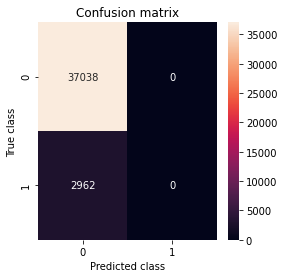

In [132]:
# conf_matrix for train
conf_matrix = confusion_matrix(y_train_churn, MLP_pred_train)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

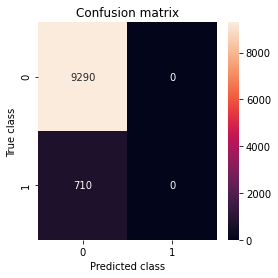

In [131]:
# conf_matrix for val
conf_matrix = confusion_matrix(y_val_churn, MLP_pred_val)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [133]:
# print recall and fnr values
tn, fp, fn, tp = confusion_matrix(y_val_churn, MLP_pred_val).ravel()
recall_churn = tp/(tp + fn)
FNR_value = 1 - recall_churn
print(f'Recall_churn: {recall_churn:.3f}, FNR_value: {FNR_value:.3f}')


Recall_churn: 0.000, FNR_value: 1.000


In [134]:
# printing roc-auc scores for train and val
print(f'ROC AUC for train MLP: {roc_auc_score(y_train_churn, MLP_pred_train):.3f}')
print(f'ROC AUC for val MLP: {roc_auc_score(y_val_churn, MLP_pred_val):.3f}')

ROC AUC for train MLP: 0.500
ROC AUC for val MLP: 0.500


In [141]:
# classification report of val
print(classification_report(y_val_churn, MLP_pred_val))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9290
           1       0.00      0.00      0.00       710

    accuracy                           0.93     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.86      0.93      0.89     10000



In [136]:
# f1 scores for train and val
f1_churn = f1_score(y_train_churn, MLP_pred_train)
print("f1 score for train is ", np.round(f1_churn,3))
f1_churn = f1_score(y_val_churn, MLP_pred_val)
print("f1 score for val is ", np.round(f1_churn,3))

f1 score for train is  0.0
f1 score for val is  0.0


In [142]:
# #Calculate permutation importance and plot a bar chart 
# pfi = permutation_importance(MLP, x_train_new, y_train_churn, n_repeats=30)
# pfidf = feature_importance(x_train_new.columns, pfi['importances_mean'], pfi['importances_std'])

# #Plot the bar plot
# sns.barplot(data=pfidf, x='importance', y='features', xerr=pfidf.importance_std)

Finally after looking all the models. We suspect our model is suffering from the data imbalance and we need to implement ideas to solve this one. like upsampling (SMOTE)

# SMOTE

In [153]:
import imblearn
print(imblearn.__version__)

0.4.3


In [154]:
from imblearn.over_sampling import SMOTE

## Random Forest

In [53]:
weights = [0.25, 0.5, 1.0]


In [56]:
pipe = make_pipeline(SMOTE(),RandomForestClassifier())

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio':weights,
        'randomforestclassifier__n_estimators': [75, 100],
        'randomforestclassifier__max_depth':[7, 9],
        'randomforestclassifier__min_samples_split': [3, 4, 5],
        'randomforestclassifier__max_features': [7, 9]


    },
    n_jobs= -1,
    verbose=1,
    scoring='roc_auc',
    cv=5
)
gsc_result = gsc.fit(x_train_new, y_train_churn)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 28.5min finished


In [155]:
smote_ratio = 0.25
max_depth = 9
min_samples_split=5
n_estimators=75
max_features = 9

In [57]:
gsc_result.best_params_

{'randomforestclassifier__max_depth': 9,
 'randomforestclassifier__max_features': 9,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 75,
 'smote__ratio': 0.25}

In [58]:
smote_ratio = gsc_result.best_params_['smote__ratio']
max_depth = gsc_result.best_params_['randomforestclassifier__max_depth']
min_samples_split = gsc_result.best_params_['randomforestclassifier__min_samples_split']
n_estimators = gsc_result.best_params_['randomforestclassifier__n_estimators']
max_features = gsc_result.best_params_['randomforestclassifier__max_features']

In [156]:
sm = SMOTE(random_state=9, ratio=smote_ratio)
x_train_bal, y_train_churn_bal = sm.fit_sample(x_train_new, y_train_churn)

In [43]:
RF_model_churn_sm = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, max_features=max_features)
RF_model_churn_sm.fit(x_train_bal, y_train_churn_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
y_train_pred_churn_rf = RF_model_churn_sm.predict(x_train_bal)
y_val_pred_churn_rf = RF_model_churn_sm.predict(x_val_new)

rf_churn_probs = RF_model_churn_sm.predict_proba(x_val_new)
rf_churn_probs = rf_churn_probs[:, 1]

rf_auc_churn = roc_auc_score(y_val_churn, rf_churn_probs)

print('RandomForest smote: ROC AUC=%.3f' % (rf_auc_churn))



RandomForest smote: ROC AUC=0.701


In [158]:
# train and val accuracies
train_accuracy = accuracy_score(y_train_churn_bal, y_train_pred_churn_rf)
validation_accuracy = accuracy_score(y_val_churn, y_val_pred_churn_rf)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.903
Validation Accuracy 0.898


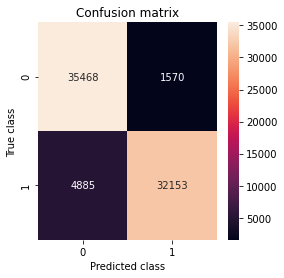

In [46]:
# confusion matrix for train_balanced
conf_matrix = confusion_matrix(y_train_churn_bal, y_train_pred_churn_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

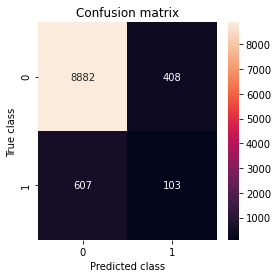

In [159]:
# confusion matrix for val
conf_matrix = confusion_matrix(y_val_churn, y_val_pred_churn_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [165]:
# recall and fnr values
tn, fp, fn, tp = confusion_matrix(y_val_churn, y_val_pred_churn_rf).ravel()
recall_churn = tp/(tp + fn)
FNR_value = 1 - recall_churn
print(f'Recall_churn: {recall_churn:.3f}, FNR_value: {FNR_value:.3f}')

Recall_churn: 0.145, FNR_value: 0.855


In [166]:
print(f'ROC_AUC for SMOTE RF train: {roc_auc_score(y_train_churn_bal, y_train_pred_churn_rf):.3f}')
print(f'ROC_AUC for SMOTE RF val: {roc_auc_score(y_val_churn, y_val_pred_churn_rf):.3f}')

ROC_AUC for SMOTE RF train: 0.821
ROC_AUC for SMOTE RF val: 0.551


In [167]:
# classification report of train
print(classification_report(y_train_churn_bal, y_train_pred_churn_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     37038
           1       0.80      0.68      0.74      9259

    accuracy                           0.90     46297
   macro avg       0.86      0.82      0.84     46297
weighted avg       0.90      0.90      0.90     46297



In [168]:
# classification report of val
print(classification_report(y_val_churn, y_val_pred_churn_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9290
           1       0.20      0.15      0.17       710

    accuracy                           0.90     10000
   macro avg       0.57      0.55      0.56     10000
weighted avg       0.88      0.90      0.89     10000



In [169]:
f1_churn = f1_score(y_train_churn_bal, y_train_pred_churn_rf)
print("f1 score for train is ", np.round(f1_churn,3))

f1_churn = f1_score(y_val_churn, y_val_pred_churn_rf)
print("f1 score for val is ", np.round(f1_churn,3))

f1 score for train is  0.739
f1 score for val is  0.169


The smote technique improved our class1 f1 score by a little of 0.06 compared to decision tree's 0.11